In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names) }
no_classes = len (class_names)
print(class_names_label)
IMAGE_SIZE = (150, 150)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
!unzip /content/drive/MyDrive/imageclassificationdataset.zip

Archive:  /content/drive/MyDrive/imageclassificationdataset.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
def load_data() :
    DIRECTORY = r"/content/seg_train"
    CATEGORY = ["seg_train", "seg_test"]
    output = []
    for category in CATEGORY:
        path = os. path. join (DIRECTORY, category)
        print (path)
        images =[]
        labels = []
        print ("Loading {}". format(category))
        for folder in os. listdir (path):
          label = class_names_label [folder]
          # Iferate through each image in our folder
          for file in os. listdir(os.path.join (path, folder)):
              # Get the path name of the image
              img_path = os.path.join(os.path.join(path, folder), file)
              # Open and resize the img
              image = cv2.imread(img_path)
              image = cv2. cvtColor (image,cv2. COLOR_BGR2RGB)
              image = cv2. resize(image, IMAGE_SIZE)
              # Append the image and its corresponding label to the output
              images. append (image)
              labels.append (label)
        images = np.array (images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output. append ((images, labels))
    return output

In [5]:
(train_images,train_labels),(test_images,test_labels)=load_data()

/content/seg_train/seg_train
Loading seg_train
/content/seg_train/seg_test
Loading seg_test


In [6]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=25)

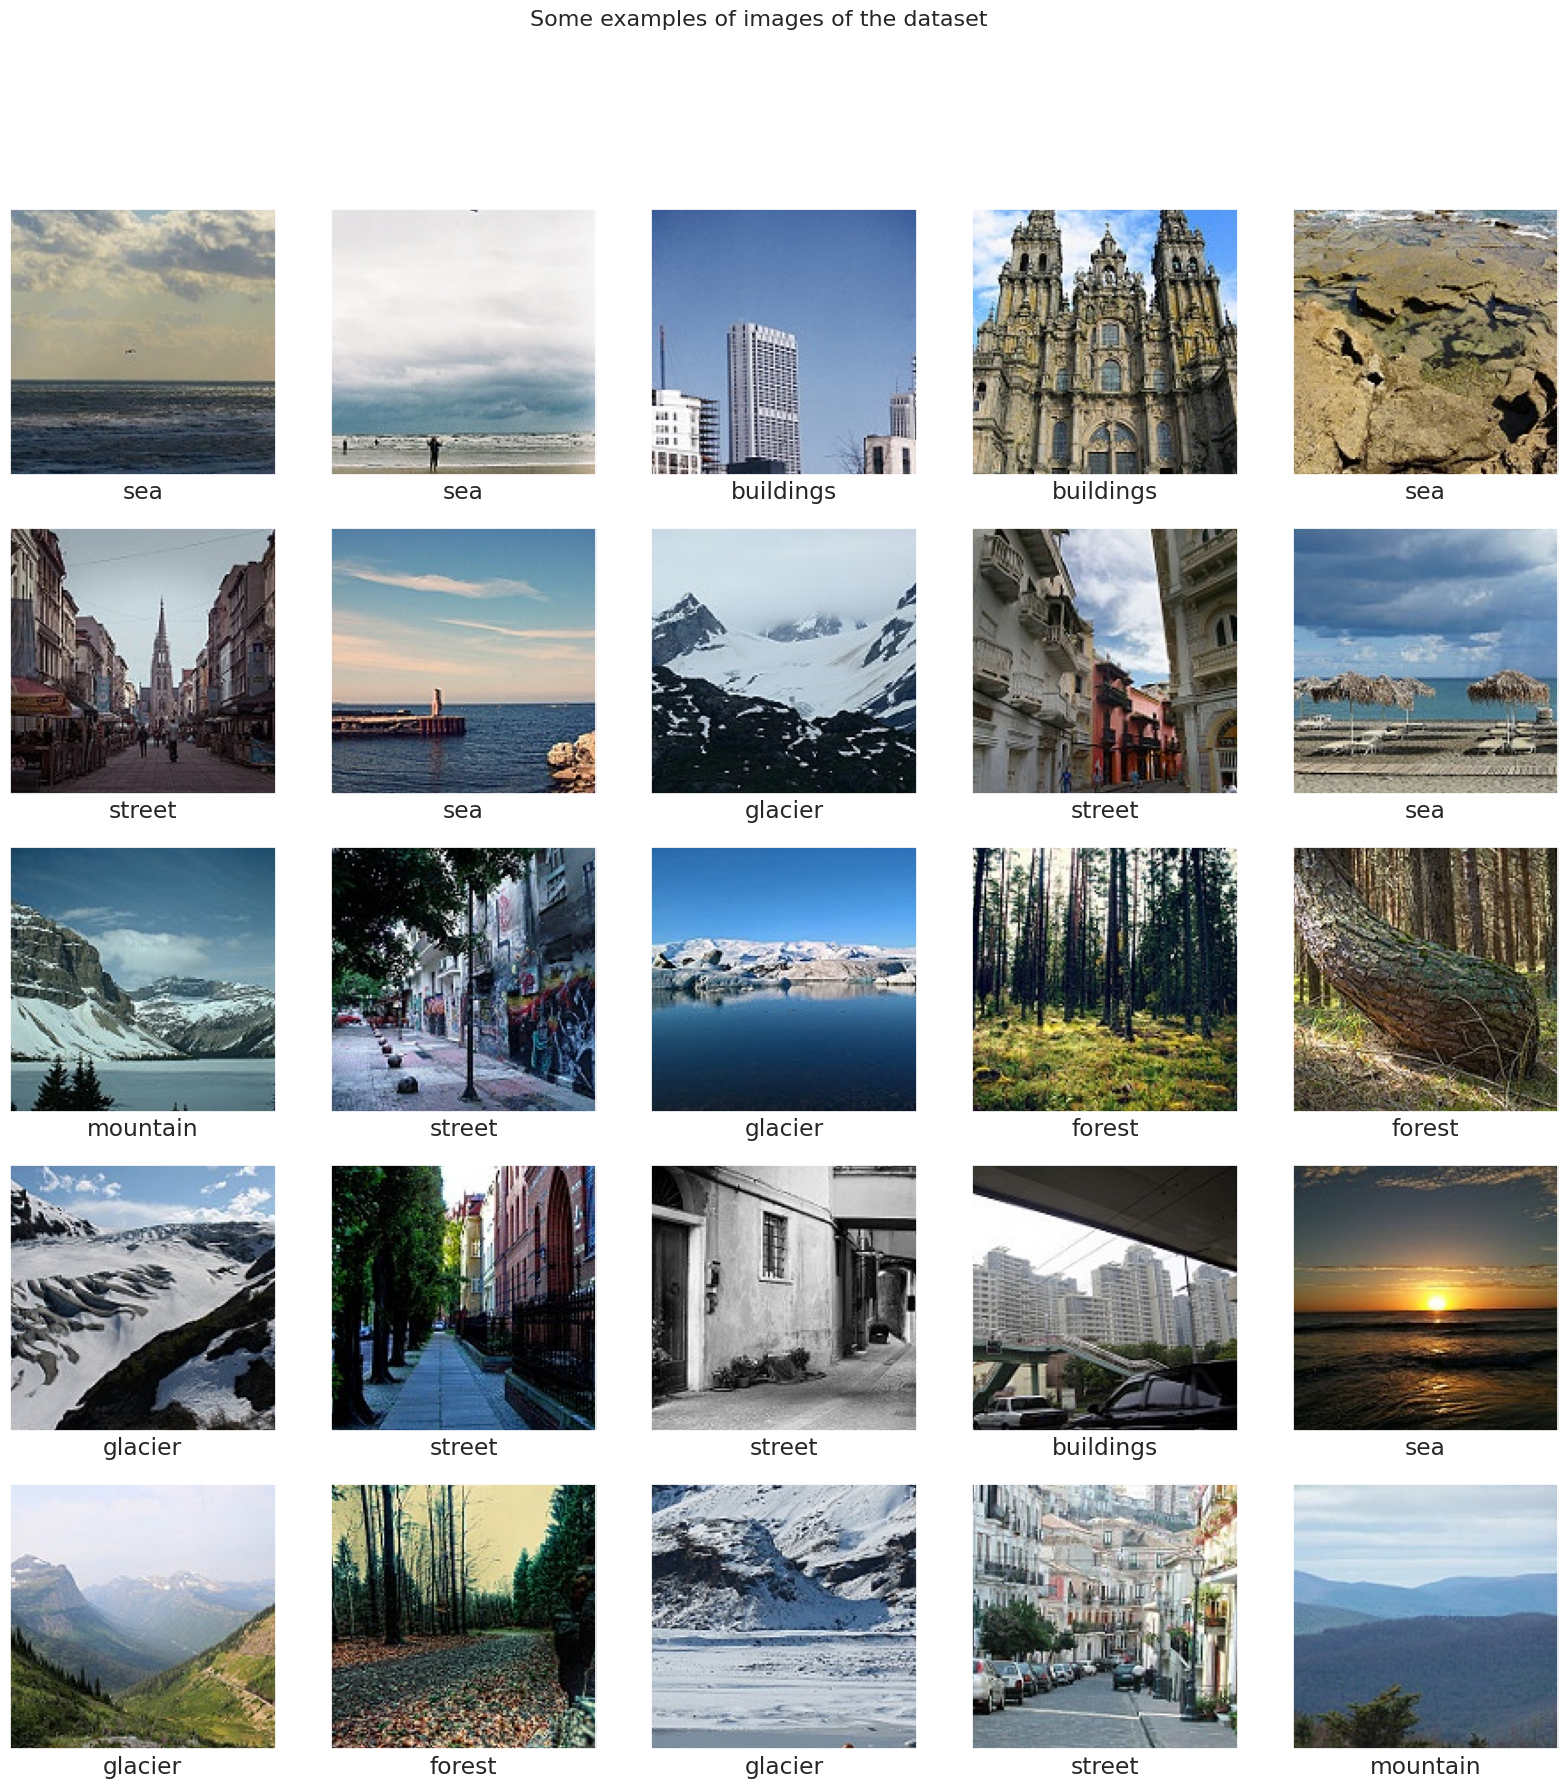

In [7]:
def display_examples(class_names, images, labels):

    figsize = (20,20)
    fig = plt. figure(figsize=figsize)
    fig. suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt. subplot (5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].astype(np.uint8))#, cmap=pLt.cm.binary)
        plt. xlabel(class_names[labels[i]])
    plt. show()
display_examples(class_names, train_images, train_labels)

In [8]:
image_model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])

In [9]:
image_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=image_model.fit(train_images,train_labels,batch_size=128,epochs=4,validation_split=0.2)

Epoch 1/4
88/88 [==============================] - 16s 110ms/step - loss: 53.4185 - accuracy: 0.2074 - val_loss: 1.8079 - val_accuracy: 0.1984
Epoch 2/4
88/88 [==============================] - 6s 65ms/step - loss: 1.7275 - accuracy: 0.2834 - val_loss: 1.6705 - val_accuracy: 0.3402
Epoch 3/4
88/88 [==============================] - 6s 70ms/step - loss: 1.4517 - accuracy: 0.4415 - val_loss: 1.5670 - val_accuracy: 0.4111
Epoch 4/4
88/88 [==============================] - 6s 64ms/step - loss: 1.0931 - accuracy: 0.5909 - val_loss: 1.6306 - val_accuracy: 0.4179


In [11]:
def plot_accuracy_loss(history):

    fig = plt. figure(figsize=(10,5))

    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt. xlabel ("epochs")
    plt. legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label ="loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt. title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt. xlabel ("epochs")
    plt. legend()
    plt. show()

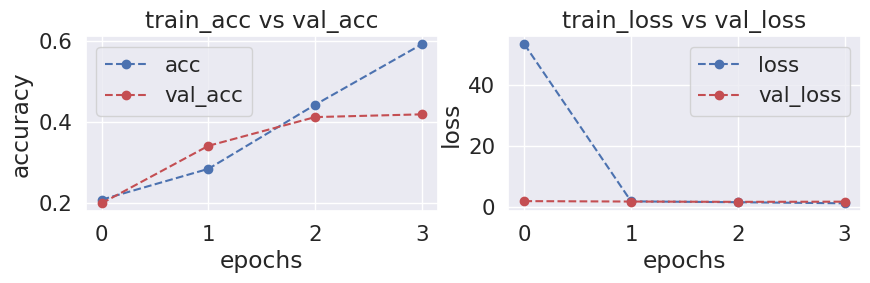

In [12]:
plot_accuracy_loss(history)

In [13]:
test_loss=image_model.evaluate(test_images,test_labels)

94/94 [==============================] - 1s 9ms/step - loss: 1.6041 - accuracy: 0.4317


In [14]:
predictions=image_model.predict(test_images)
pred_labels=np.argmax(predictions,axis=1)
print(classification_report(test_labels,pred_labels))

94/94 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.39      0.29      0.33       525
           1       0.47      0.45      0.46       501
           2       0.38      0.69      0.49       553
           3       0.35      0.29      0.32       437
           4       0.30      0.15      0.20       510
           5       0.66      0.71      0.68       474

    accuracy                           0.43      3000
   macro avg       0.42      0.43      0.41      3000
weighted avg       0.42      0.43      0.41      3000

